# Warm-up data exploration and visualization

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_



___
__Note__

- _This assignment description was prepared with the assistance of ChatGPT 5._

- _Students are also permitted to use ChatGPT to support their work on this assignment, provided that all sources of assistance are properly acknowledged, and that the correctness of ChatGPT’s responses is carefully verified before use._

<br>

___

<br>

## Objective

The purpose of this assignment is to provide students with an opportunity to practice essential Python-based data analysis and visualization skills. Building upon the introductory lecture on Python, NumPy, Matplotlib, and Pandas, this task emphasizes independent exploration of aerospace-related datasets and the extraction of meaningful insights.



## Task Description

Each student is required to search for a dataset of personal interest related to aerospace science or engineering. The dataset may be obtained from publicly available online sources, such as governmental agencies, research organizations, or academic repositories. Once an appropriate dataset has been identified, students should perform the following steps:

-	Provide a brief explanation of why this dataset was selected, highlighting its relevance or personal interest in the aerospace domain.
-	Import the dataset into Python using Pandas (e.g., from CSV or Excel format).
-	Preprocess the data as necessary (e.g., handling missing values, renaming columns, adjusting units).
-	Apply NumPy operations, where appropriate, to manipulate or transform the data.
-	Visualize the results using Matplotlib, ensuring that the plots are clear, properly labeled, and scientifically informative.



## Deliverables

All work must be completed directly in the provided Jupyter Notebook file, and the students should write both the code cells (for data handling, processing, and visualization) and the report sections (in Markdown cells) within the same notebook.

The written report should immediately follow the assignment description in the notebook and include the following elements:

-	A description of the dataset, including its source, relevance to aerospace applications, and the motivation for selecting it.
- A clear explanation of the preprocessing steps and analysis methods applied.
- Graphical results (plots, charts, or other visualizations) generated from the dataset.
- A discussion of insights gained from the analysis and potential implications in the aerospace domain.


<br>

---

<br>


## 12210472 양동훈 HW1

- 본 분석에 사용한 데이터는 NASA의 오픈소스 궤도 시뮬레이션 도구 GMAT의 샘플 미션 Hohmann Transfer를 실행해 생성한 궤도 상태벡터 로그입니다.\
각 시각의 지구중심 관성좌표계(EarthMJ2000Eq) 기준 위치(X,Y,Z)[km]와 속도(VX,VY,VZ)[km/s] 총 6개 컬럼으로 구성됩니다.\
인공위성과 우주비행역학에 대한 개인적 관심과 지난 학기 프로젝트를 통한 GMAT 사용 경험을 바탕으로, 수업에서 배운 호만 천이의 이론값과 수치 시뮬레이션 결과를 Python(Pandas/NumPy/Matplotlib)로 비교·검증하며 복습/워밍업하기에 적합하다고 판단해 선정했습니다.

---
- Data에서 주어진 **X, Y, Z**를 이용하여 현재 위치의 반경을 계산하고, 이를 `r` 칼럼에 저장하였다.  
  - 계산식: $ r = \sqrt{X^2 + Y^2 + Z^2} $ 

- 또한 **VX, VY, VZ**를 이용하여 속도의 크기(벡터의 magnitude)를 계산하고, 이를 `VMAG` 칼럼에 저장하였다.  
  - 계산식: $ VMAG = \sqrt{VX^2 + VY^2 + VZ^2} $


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #데이터셋을 다루고, 시각화를 하기 위한 라이브러리들을 불러옵니다.

transfer_data = pd.read_csv("HohmannTransfer param.csv") 
transfer_data["VMAG"] = np.sqrt((transfer_data["VX"])**2 + (transfer_data["VY"])**2 + (transfer_data["VZ"])**2)
#데이터셋에 존재하는 속도 데이터를 통해서 현재의 속도의 크기을 계산하고, 새로운 칼럼으로 저장합니다.
transfer_data["r"] = np.sqrt((transfer_data["X"])**2 + (transfer_data["Y"])**2 + (transfer_data["Z"])**2)
#데이터셋에 존재하는 위치 데이터를 통해서 현재의 반경을 계산하고, 새로운 칼럼으로 저장합니다.
transfer_data
#잘 저장되었는 지 확인


FileNotFoundError: [Errno 2] No such file or directory: 'HohmannTransfer param.csv'

---
* GMAT 스크립트에는 **천이 전(초기) 궤도의 이심률 값이 명시되어 있지 않고**, 최종 궤도 제약(**ECC = 0**)만 주어져 있으므로, 본 분석에서는 **시뮬레이션 로그의 상태벡터**로 이심률을 산출하고, 그 결과를 바탕으로 **호만 전이 이론식**으로 천이 시 속도 증분(Δv)을 계산한다. *(좌표계 EarthMJ2000Eq, 단위: r\[km], v\[km/s], $\mu=398600.4418\ \text{km}^3/\text{s}^2$)*

### 이론식

**1) 이심률 및 반장축**

$$
\mathbf h=\mathbf r\times\mathbf v,\qquad
\hat{\mathbf r}=\frac{\mathbf r}{\lVert\mathbf r\rVert},\qquad
\mathbf e=\frac{\mathbf v\times\mathbf h}{\mu}-\hat{\mathbf r},\quad
e=\lVert\mathbf e\rVert
$$

$$
a=\frac{1}{\left(\frac{2}{\lVert\mathbf r\rVert}-\frac{\lVert\mathbf v\rVert^2}{\mu}\right)},\qquad
r_p=a(1-e)
$$

**2) 목표 원궤도 반경 추정**

$$
r_2 \approx \text{mean}\big(r(t)\ \text{of last }N\text{ samples}\big)
$$

**3) 초기 타원 반영 호만 전이(근지점에서 1차 임펄스)**

$$
a_t=\frac{r_p+r_2}{2},\qquad
v_{p0}=\sqrt{\mu\!\left(\frac{2}{r_p}-\frac{1}{a}\right)},\quad
v_{pT}=\sqrt{\mu\!\left(\frac{2}{r_p}-\frac{1}{a_t}\right)},\quad
\Delta v_1=v_{pT}-v_{p0}
$$

$$
v_{aT}=\sqrt{\mu\!\left(\frac{2}{r_2}-\frac{1}{a_t}\right)},\quad
v_{c2}=\sqrt{\frac{\mu}{r_2}},\quad
\Delta v_2=v_{c2}-v_{aT},\qquad
\Delta v_{\text{total}}=\Delta v_1+\Delta v_2
$$

In [ ]:
import numpy as np

mu = 398600.4418  # km^3/s^2

# 첫 행 상태
r = transfer_data[["X","Y","Z"]].to_numpy()
v = transfer_data[["VX","VY","VZ"]].to_numpy()
r0 = r[0] #r값의 첫번째 값을 초기값으로 저장
v0 = v[0] #v값의 첫번째 값을 초기값으로 저장

#저장된 초기 벡터값을 2-norm을 이용하여 크기를 구한다.
r0n = np.linalg.norm(r0)
v0n = np.linalg.norm(v0) 

# e0, a0
h0 = np.cross(r0, v0) #위 수식을 이용해 초기 각 운동량을 구한다.
e_vec0 = np.cross(v0, h0)/mu - r0/r0n #이심률 벡터를 구한다.
e0 = np.linalg.norm(e_vec0) #2-norm을 이용해서 초기 이심률값을 구한다.
a0 = 1.0 / (2.0/r0n - v0n**2/mu) #vis-viva 방정식을 정리하여 나온 결과
rp = a0*(1 - e0) #기하학적 관계에 의해서 초기지점의 반경을 구한다.

# r2: 마지막 N개 평균
N = 20
r2 = transfer_data["r"][-N:].mean() #오차를 줄이기 위해서 최종값이 아닌 최종값에서 20개 정도의 샘플값을 평균을 내서 최종 궤도 반경을 결정한다.

# 천이타원
at = 0.5*(rp + r2) #위에서 구한 시작, 최종 반경을 이용하여 천이궤도인 타원의 장반경을 구한다.


#에너지 차이를 이용하여 정리
# Δv1 (근지점)
vp0 = np.sqrt(mu*(2/rp - 1/a0)) 
vpT = np.sqrt(mu*(2/rp - 1/at))
first_delta_v = vpT - vp0

# Δv2 (아포지)
vaT = np.sqrt(mu*(2/r2 - 1/at))
vc2 = np.sqrt(mu/r2)
second_delta_v = vc2 - vaT

print(f"첫 번째 기동 시 필요한 속도 증분 : {first_delta_v}")
print(f"두 번째 기동 시 필요한 속도 증분 : {second_delta_v}")

---
* 위에서 계산한 이론값과 시뮬레이션 값의 차이가 허용오차 $\varepsilon=0.01$ 이하가 되는 인덱스을 impulse 포인트로 정의한다.\
그 과정에서 구한 인덱스를 통해서 시뮬레이션의 임펄스 값을 구한다.


In [ ]:


simul_delta_v = [] #GMAT 데이터상에서 천이 시 필요한 속도 증분 값을 저장하기 위해서 빈 리스트를 저장한다.

#for문을 통해서 위에서 구한 이론식과 허용오차가 0.01이 되는 index 값들을 저장하고, 그 속도차이 값을 빈 리스트에 저장한다.
for i in range(1,len(transfer_data["VX"])) :
    if abs(transfer_data['VMAG'][i] - transfer_data["VMAG"][i-1] - first_delta_v) < 1e-2:
        first_transfer_point = i
        simul_delta_v.append(abs(transfer_data['VMAG'][i] - transfer_data["VMAG"][i-1]))
    elif abs(transfer_data['VMAG'][i] - transfer_data["VMAG"][i-1] - second_delta_v) < 1e-2 :
        second_transfer_point = i
        simul_delta_v.append(abs(transfer_data['VMAG'][i] - transfer_data["VMAG"][i-1]))

print(f"첫 번째 impulse point의 index : {first_transfer_point}")
print(f"두 번째 impulse point의 index : {second_transfer_point}")
print(f"GMAT data에서의 첫 번째 속도 증분 : {simul_delta_v[0]}")
print(f"GMAT data에서의 첫 번째 속도 증분 : {simul_delta_v[1]}")

---
* 위에서 구한 시뮬레이션의 속도 증분과 이론값과의 오차를 구한 결과를 구하는 과정 및 결과

In [ ]:
first_manuever_error = abs(simul_delta_v[0]-first_delta_v)/first_delta_v
second_manuever_error = abs(simul_delta_v[1]-second_delta_v)/second_delta_v

print(f"첫 번째 기동 시 오차 : {first_manuever_error*100: .4f}%")
print(f"두 번째 기동 시 오차 : {second_manuever_error*100: .4f}%")

---
* 데이터에 존재하는 VX, VY, VZ 값과 전처리를 통해서 저장한 VMAG값을 각각 subplot을 이용하여 플롯하고,\
 전 과정에서 구한 index를 이용하여 impulse point를 점으로 찍어 표현하였다.

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("Velocity during Hohmann Transfer")
plt.subplot(2,2,1)
plt.plot(transfer_data.index, transfer_data["VX"], label ='VX')
plt.scatter(45, transfer_data["VX"][45], color ='r', label ='first impulse point')
plt.scatter(87, transfer_data["VX"][87], color ='b', label ='second impulse point')
plt.ylabel("X-Axis Velocity [km/s]")
plt.xlabel("Step(Index or Time)")
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.plot(transfer_data.index, transfer_data["VY"], label='VY')
plt.scatter(45, transfer_data["VY"][45], color ='r', label ='first impulse point')
plt.scatter(87, transfer_data["VY"][87], color ='b', label ='second impulse point')
plt.ylabel('Y-Axis Velocity [km/s]')
plt.xlabel("Step(Index or Time)")
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.plot(transfer_data.index, transfer_data["VZ"], label="VZ")
plt.scatter(45, transfer_data["VZ"][45], color ='r', label ='first impulse point')
plt.scatter(87, transfer_data["VZ"][87], color ='b', label ='second impulse point')
plt.grid(True)
plt.ylabel("Z-Axis Velocity [km/s]")
plt.xlabel("Step(Index or Time)")
plt.legend()

plt.subplot(2,2,4)
plt.plot(transfer_data.index, transfer_data["VMAG"], label="|V| (km/s)")
plt.scatter(45, transfer_data["VMAG"][45], color ='r', label ='first impulse point')
plt.scatter(87, transfer_data["VMAG"][87], color ='b', label ='second impulse point')
plt.xlabel("Step (index or time)")
plt.ylabel("Velocity Magnitude [km/s]")
plt.legend()
plt.grid(True)
plt.show()

---
* 주어진 X, Y, Z 데이터를 이용하여 3차원 공간에서 호만 천이 궤적을 시각화하였다. 또한 각 기동 구간을 서로 다른 색으로 구분하여 궤적의 변화를 명확하게 표현하였다.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D #3차원 공간을 plot하기 위해서 라이브러리를 import 하였다.

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(transfer_data["X"][:45], transfer_data["Y"][:45], transfer_data["Z"][:45], label = "original orbit", color ='green')
ax.plot(transfer_data["X"][46:87], transfer_data["Y"][46:87], transfer_data["Z"][46:87], label = "Manuever orbit", color ='blue')
ax.plot(transfer_data["X"][88:], transfer_data["Y"][88:], transfer_data["Z"][88:], label = "Final oribit", color ='r')
ax.scatter(transfer_data["X"][0], transfer_data["Y"][0], transfer_data["Z"][0], label = "Starting Point", color ='yellow')
ax.scatter(transfer_data["X"][46], transfer_data["Y"][46], transfer_data["Z"][46], label = "1st Manever Point", color ='r')
ax.scatter(transfer_data["X"][87], transfer_data["Y"][87], transfer_data["Z"][87], label = "2nd Manever point", color ='black')

# 지구 표시 (단순 구체, 반지름 6378 km)
R_earth = 6378
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)
x = R_earth * np.outer(np.cos(u), np.sin(v))
y = R_earth * np.outer(np.sin(u), np.sin(v))
z = R_earth * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color="b", alpha=0.5) # 중앙에 구를 그리기 위해서 구면좌표계를 이용하여 지구를 plot하였다.

ax.set_xlabel("X [km]")
ax.set_ylabel("Y [km]")
ax.set_zlabel("Z [km]")

ax.set_title("Hohmann Transfer Orbit")
ax.legend()
plt.show()

### 논의(Discussion) 및 검증

![스크린샷 2025-09-04 152149.png](<attachment:스크린샷 2025-09-04 152149.png>)

* 시각적 검증(3D 궤적 일치) :\
  GMAT OpenGL 뷰(위 그림)와 파이썬에서 그린 3D 궤적이 근지점–아포지 위치 관계, 전이타원 형태, 두 번의 임펄스 지점까지 동일하게 재현되었다.\
  이는 데이터 로드·단위·좌표계(EarthMJ2000Eq) 가정이 일관됨을 뒷받침한다.

* 통찰 (Insights)  

  분석 결과, 임펄스가 가해질 때 $V_X$ 성분에서 가장 큰 변화가 발생하였다. 이는 궤도의 기하학적 특성상 기동이 주로 접선 방향 속도를 변화시켜 궤도 형성에 직접적으로 기여하기 때문으로 해석된다.  

  또한 이론적으로 계산한 ΔV와 비교했을 때 시뮬레이션에서의 ΔV가 더 크게 산출되었는데, 이는 초기 궤도가 완전한 원궤도가 아니어서 이심률이 미세하게 변하고, 저궤도 환경에서의 고도 침하를 단순히 무시했기 때문에 발생한 오차로 판단된다. 더불어 수치적 근사 과정에서의 보간 및 샘플링 차이 역시 이러한 차이에 영향을 주었을 것으로 보인다.  

  따라서 향후 분석에서는 초기 이심률을 고정하여 전파하는 방식 대신, **시간에 따라 변화하는 이심률 값을 반영하여 속도 증분을 계산**한다면 ΔV 추정의 정확도를 더욱 향상시킬 수 있을 것이다.


* 항공우주적 함의 (Implications)  

  이러한 분석은 위성 기동 시 연료 소모량을 예측하는 데 중요한 의미를 갖는다. 특히 ΔV 오차의 원인을 이해함으로써 실제 임무 설계 시, 이상적인 2체문제 해석만으로는 부족하며 중력장 섭동(J2), 초기 이심률, 수치 오차의 누적 효과를 반드시 고려해야 함을 보여준다. 이는 곧 최소 ΔV 기동을 통한 연료 효율성 확보와 더불어, 장기 임무 수행 시 궤도 예측 정확성을 높이는 데 기여할 수 있다.  

  또한 본 과제에서는 임펄스 기동(impulsive burn)을 가정하였으나, 실제 추진계는 유한 연소시간을 갖는 finite burn 방식이다. 따라서 ΔV와 궤도 변화 해석은 기본적으로 유사하게 적용되지만, finite burn에서는 기동 중 중력 손실과 추력 방향 제어와 같은 추가적인 요소까지 반영해야 한다. 그럼에도 본 분석 방법론은 finite burn 시나리오에도 확장하여 적용할 수 있을 것이다.

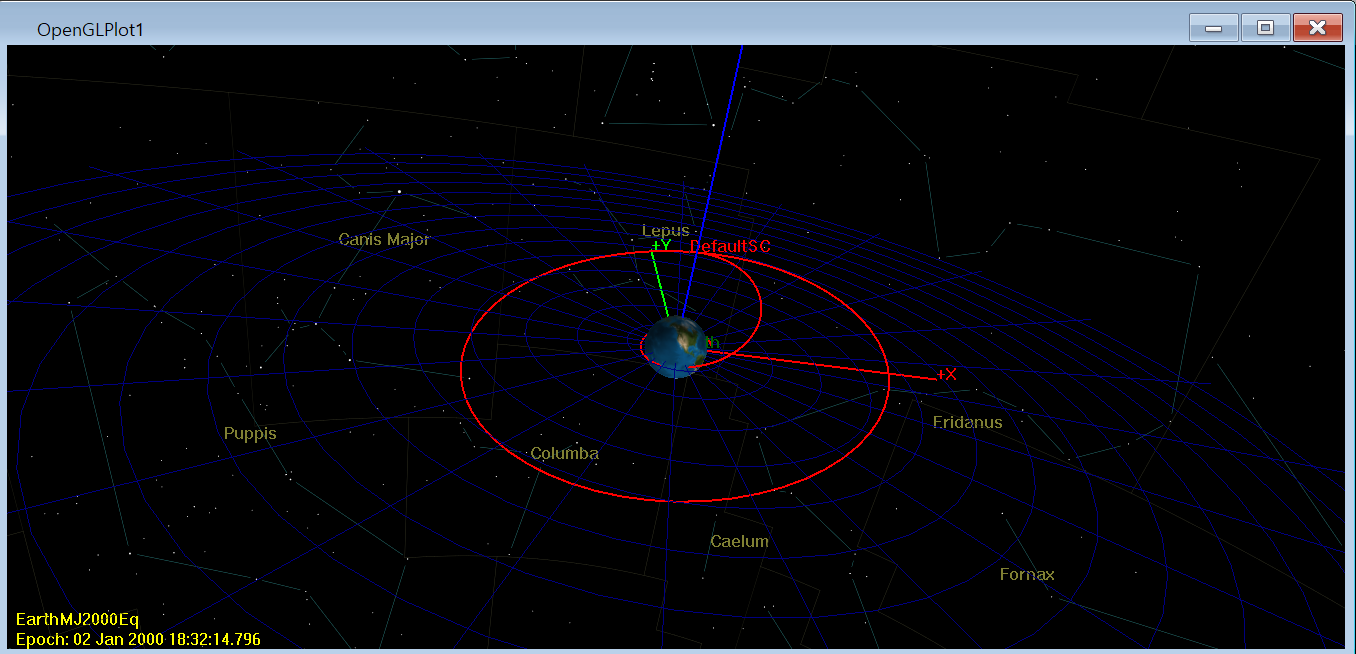